Finance Data Project:
exploratory data analysis of stock prices

Imports : importing the basic library used 

Here we are going read data regarding the stock info for few banks and carry on some basic data visualisation and analysis using Matplotlib and Seaborn libraries.

Bank stock info can easily be fatched from yahoo or google, due to some recent changes was unable to read data from google so i preferably yahoo used in this project. 
Carry on with this project we need to have some basic libraries installed like pandas , numpy utlisized for data maintence and manupulation. For data visualisation we need matplotlib and seaborn. We could install this libraries through our terminal using example: pip install numpy.
Along with this to read data from webserver we would require pandas_datareader package installed.

The imports:

In [2]:
#to fetch data from webserver
from pandas_datareader import data, wb
#data maintaince and manipulation 
import pandas as pd
import numpy as np
#use for datetime conversion
from datetime import datetime
#data visvalisation
import seaborn as sns
import matplotlib.pyplot as plt
#to display the plots in the notebook itself
%matplotlib inline

fetching the a decade old bank stock data from 2009 to 2019

In [29]:
start = datetime(2009, 1, 1)
end = datetime(2019, 1, 1)


using the head funcion 

In [42]:
Goldman = data.DataReader('GS', 'yahoo', start, end)
Goldman.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,86.150002,81.120003,82.239998,84.389999,14894100.0,71.672134
2009-01-02,87.620003,82.190002,84.019997,86.760002,14088500.0,73.684967
2009-01-05,90.949997,85.459999,85.809998,88.779999,15996700.0,75.400528
2009-01-06,92.199997,87.720001,90.050003,88.709999,21551800.0,75.341080
2009-01-07,87.849998,83.650002,86.910004,84.500000,12465500.0,71.765533


In [43]:
Citigroup = data.DataReader('C', 'yahoo', start, end)
Morgan = data.DataReader('MS', 'yahoo', start, end)
JPMorgan = data.DataReader('JPM', 'yahoo', start, end)
Wells_Fargo = data.DataReader('WFC', 'yahoo', start, end)

In [44]:
tickers = ['C','MS','JPM','WFC','GS']

In [45]:
tickers

['C', 'MS', 'JPM', 'WFC', 'GS']

In [46]:
bank_stocks = pd.concat([Citigroup,Morgan,JPMorgan,Wells_Fargo,Goldman],axis=1,keys=tickers)

In [47]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker          C                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2008-12-31   70.400002  66.199997  67.199997  67.099998   9255800.0   
2009-01-02   71.599998  67.500000  68.699997  71.400002  10470700.0   
2009-01-05   75.000000  70.300003  71.199997  70.800003  12818400.0   
2009-01-06   75.900002  72.800003  72.900002  74.599998  11249800.0   
2009-01-07   74.400002  70.800003  72.199997  71.500000  10528700.0   

Bank Ticker                    MS                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2008-12-31   60.855492  16.080000  15.030000  15.160000  16.040001  ...   
2009-01-02   64.755325  17.040001  15.750000  16.010000  16.990000  ...   
2009-01-05   64.211182  18.360001  16.780001  16.799999  17.620001  ...   
2009-01-06   67.657509  19.930000  18.000000  18.070000  19.580000  ...   
2009-01-07   64.846024  19.379999  17.760000  19.070000  18.100000  ...   

Bank Ticker        WFC                                           GS  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2008-12-31   28.690001  29.480000  45109700.0  21.485636  86.150002   
2009-01-02   29.180000  30.000000  36522300.0  21.864622  87.620003   
2009-01-05   29.740000  28.059999  43614200.0  20.450720  90.949997   
2009-01-06   28.670000  27.540001  54222900.0  20.071730  92.199997   
2009-01-07   27.080000  25.870001  52631000.0  18.854597  87.849998   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2008-12-31   81.120003  82.239998  84.389999  14894100.0  71.672134  
2009-01-02   82.190002  84.019997  86.760002  14088500.0  73.684967  
2009-01-05   85.459999  85.809998  88.779999  15996700.0  75.400528  
2009-01-06   87.720001  90.050003  88.709999  21551800.0  75.341080  
2009-01-07   83.650002  86.910004  84.500000  12465500.0  71.765533  

[5 rows x 30 columns]

Get the max value for the stock for each bank, we would use .xs function to handle multi-indexing
useful links:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

In [48]:
bank_stocks.xs(key ='Close',axis =1,level ='Stock Info').max()

Bank Ticker
C       80.080002
MS      58.910000
JPM    118.769997
WFC     65.930000
GS     273.380005
dtype: float64

Next we will create another dataframe to  store the calculated returns value for each bank and we would use the .pct_change() function of pandas for change calculation  
Useful links :https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html

In [50]:
returns = bank_stocks.xs(key ='Close',axis =1,level ='Stock Info').pct_change()

In [51]:
returns.rename(columns={'C' : 'C Returns', 'MS':'MS Returns','JPM' :'JPM Returns','WFC':'WFC Returns','GS' : 'GS Returns' ,},
              inplace = True)
returns.head()

Bank Ticker,C Returns,MS Returns,JPM Returns,WFC Returns,GS Returns
Date,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.064084,0.059227,-0.005709,0.017639,0.028084
2009-01-05,-0.008403,0.037081,-0.066986,-0.064667,0.023283
2009-01-06,0.053672,0.111237,0.021538,-0.018532,-0.000788
2009-01-07,-0.041555,-0.075587,-0.059906,-0.060639,-0.047458


Creating a pairplot to check the general trends using seaborn on our newly generated dataframe


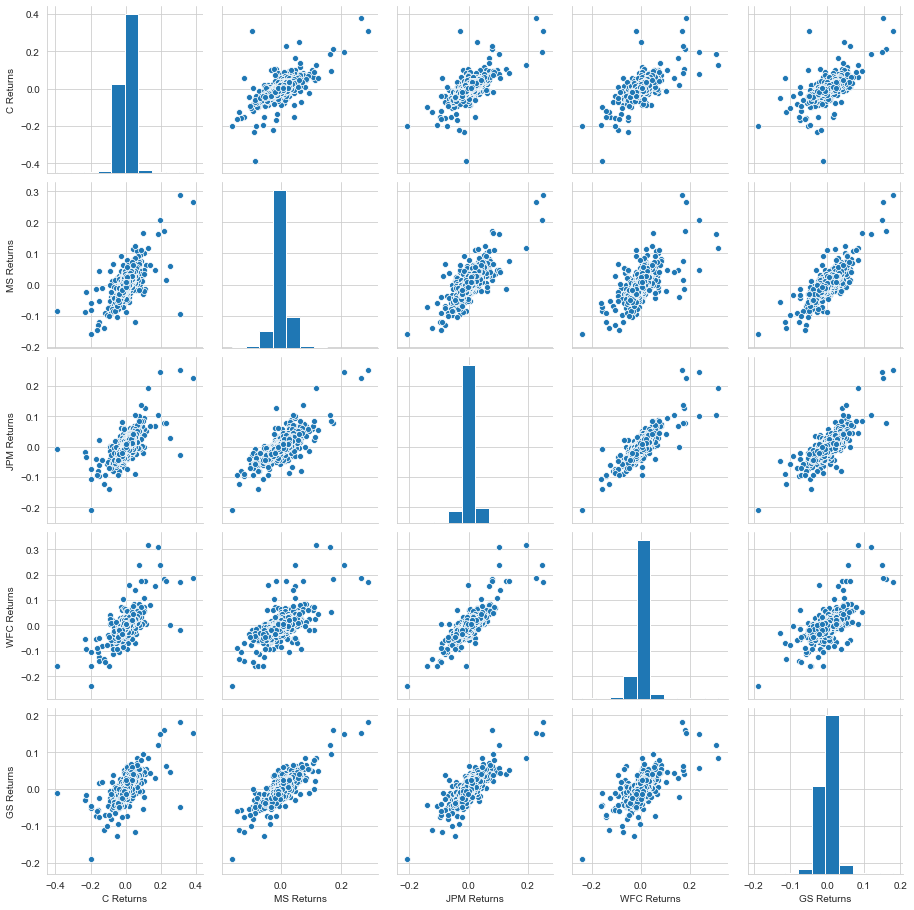

In [52]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(data = returns[1:])

Exploring the data a little more to find out on what particular day our stock has max and min value, and this we could get by using functions like .idxmax and .idxmin, these function provides the min and max value associated index 

for more details:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html

In [54]:
returns.idxmax()

Bank Ticker
C Returns     2009-03-10
MS Returns    2009-01-21
JPM Returns   2009-01-21
WFC Returns   2009-04-09
GS Returns    2009-01-21
dtype: datetime64[ns]

In [55]:
returns.idxmin()

Bank Ticker
C Returns     2009-02-27
MS Returns    2009-01-20
JPM Returns   2009-01-20
WFC Returns   2009-01-20
GS Returns    2009-01-20
dtype: datetime64[ns]

lets calculate the standar deviation for the year 2015, to get a to get the value associated to a particular index we use .loc() function

to get more insights check this stackover flow question:https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat

In [56]:
returns.loc['2015-01-01':'2015-12-31'].std()

Bank Ticker
C Returns      0.015289
MS Returns     0.016249
JPM Returns    0.014017
WFC Returns    0.012591
GS Returns     0.014046
dtype: float64

lets plot some histogram using seaborn displot() function for Morgan Stanley in the year 2015


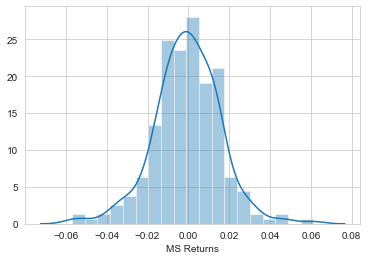

In [57]:
sns.distplot(returns['MS Returns'].loc['2015-01-01':'2015-12-31'])

similarly could create for other banks lets do some modification in terms of its apprearance

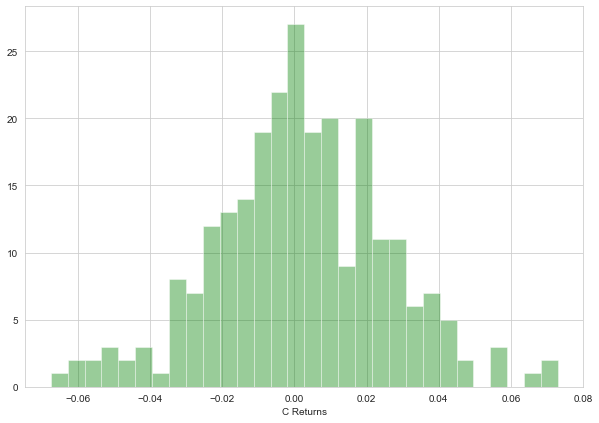

In [61]:
plt.figure(figsize=(10,7))
sns.distplot(returns['C Returns'].loc['2010-01-01':'2010-12-31'],bins=30,kde=False,color='green')

using cufflinks package for creation of interactive plots

In [62]:
import plotly
import cufflinks as cf
cf.go_offline()

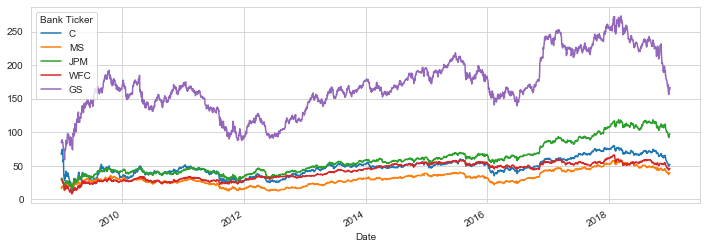

In [63]:
bank_stocks.xs(key = 'Close',axis =1 ,level ='Stock Info').plot(figsize=(12,4),label = 'Bank Ticker')

only difference is to use iplot() instead of plot(), the legend and figsize are auto adjusted with iplot()

In [65]:
bank_stocks.xs(key = 'Close',axis =1 ,level ='Stock Info').iplot()

using rolling function, basically here we specify the window and perform the desired calculation on to it

useful links:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

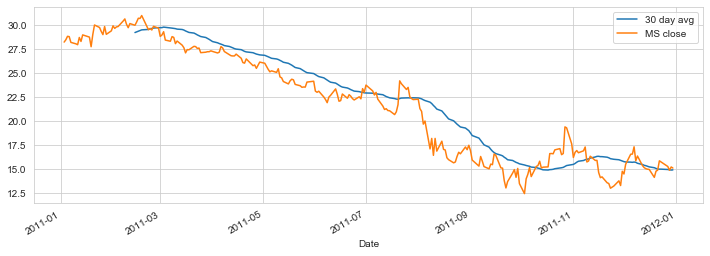

In [66]:
plt.figure(figsize=(12,4))
bank_stocks['MS']['Close'].loc['2011-01-01':'2011-12-31'].rolling(window=30).mean().plot(label ='30 day avg')
bank_stocks['MS']['Close'].loc['2011-01-01':'2011-12-31'].plot(label ='MS close')
plt.legend()

Next lets use heatmap() this is use to graphically present the correlation between the matrix elements with the different colour intensity, we need to normalise our dataframe 

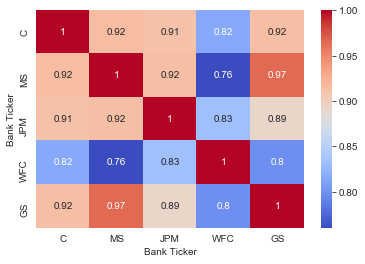

In [68]:
sns.heatmap(bank_stocks.xs(key = 'Close',axis =1 ,level ='Stock Info').corr(),annot=True ,cmap='coolwarm')

 Use seaborn's clustermap to cluster the correlations together

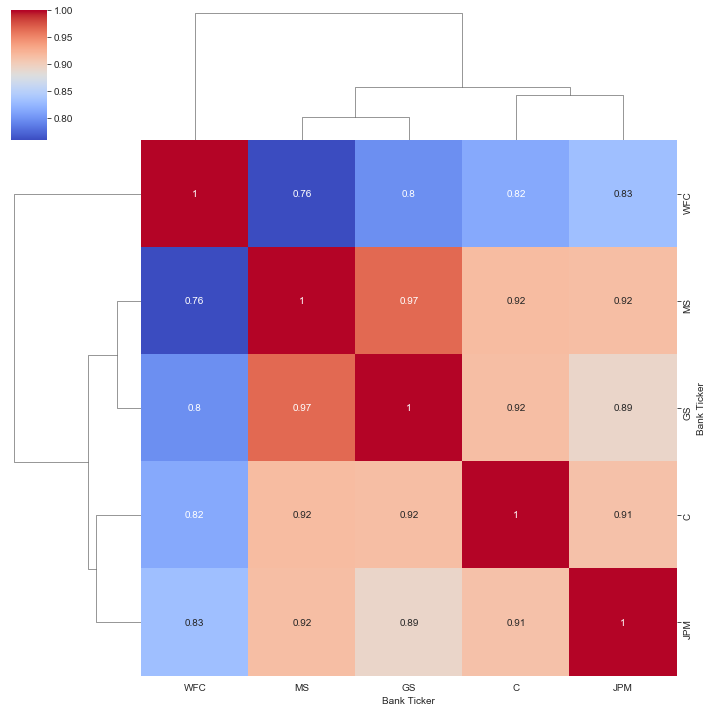

In [69]:
sns.clustermap(bank_stocks.xs(key = 'Close',axis =1 ,level ='Stock Info').corr(),annot=True ,cmap='coolwarm')

In [71]:
To get an insight about the stock performance of the high and low point over a whole year.

SyntaxError: invalid syntax (<ipython-input-71-c8834f3782df>, line 1)

In [70]:
bank_stocks['MS'][['High','Low','Open','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')